In [23]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA

/home/levon/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
mnist_data = fetch_openml('mnist_784',version = 1)
images,labels = mnist_data['data'], mnist_data['target']

In [18]:
images = images[:20000]
labels = labels[:20000]

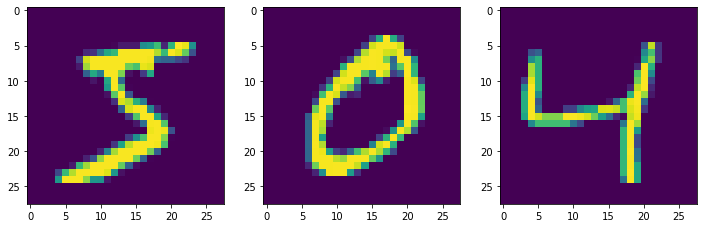

In [7]:
fig, axes = plt.subplots(1,3,figsize=(12,8))
for i,ax in enumerate(axes):
    ax.imshow(images[i].reshape(28,28))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=0)

In [20]:
clf = linear_model.SGDClassifier(loss='log')

In [22]:
start = time.time()
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
end = time.time()
print(score)
print(end-start)

0.8838
19.322046041488647


In [34]:
pca = PCA(n_components=400)
images_transformed = pca.fit_transform(images)
print(pca.n_components_)
print(images_transformed.shape)

400
(20000, 400)


In [35]:
images_returned = pca.inverse_transform(images_transformed)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(images_transformed, labels, random_state=0)

In [37]:
start = time.time()
clf.fit(X_train, y_train)
score = clf.score(X_test,y_test)
end = time.time()
print(score)
print(end-start)

0.8354
12.408447504043579
